In [1]:
import numpy as np
import seaborn as sns

In [92]:
def randomSin(x):
    return np.sin(x)+np.random.normal(size=len(x), scale=0.4)

In [165]:
x = np.linspace(0,8,200)
x = list(x)

In [166]:
tx = x

In [167]:
for i in range(4):
    x = np.dot(x,1.1)
    tx.extend(x)
tx.sort()

In [168]:
len(tx)

1000

In [169]:
tx = np.array(tx)

In [170]:
ty = randomSin(tx)
ty

array([ 3.47324419e-01,  3.00964095e-01,  1.02466627e-01, -4.43123443e-02,
        3.09167696e-01,  1.91613089e-02,  1.49793089e-03,  2.22846546e-01,
        6.95357192e-01,  2.69635045e-02,  2.09495517e-01, -9.11620062e-01,
        4.90302626e-01, -4.69709335e-01, -1.27012533e-01,  3.44392401e-01,
        6.92806487e-02, -8.99675263e-02,  2.16861074e-01,  1.36667794e-02,
       -2.12553198e-01,  7.00271544e-02, -3.49103555e-02, -6.27104761e-01,
        5.37848116e-01,  1.98405650e-01, -1.98487229e-03, -3.15658087e-01,
        1.95264770e-01, -2.89563136e-01,  5.25421815e-01,  4.64036813e-01,
        1.05977652e+00,  7.60863608e-01, -2.66500506e-01, -1.96080510e-01,
       -2.00941250e-01,  1.10305848e-01, -1.44556760e-01,  1.76463515e-01,
        6.09555758e-01,  7.46368500e-02,  6.13773762e-01,  4.30624405e-01,
       -4.05744067e-01,  5.71650765e-02,  4.36940299e-01,  1.07333219e-01,
        7.15238773e-01, -1.21234382e-01,  7.92387473e-01,  4.98670692e-01,
        4.36994098e-01,  

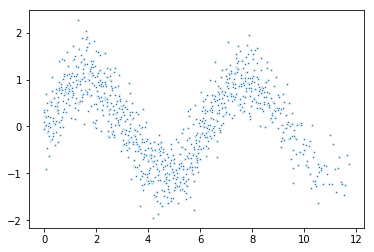

In [171]:
sns.scatterplot(tx, ty, s=6)

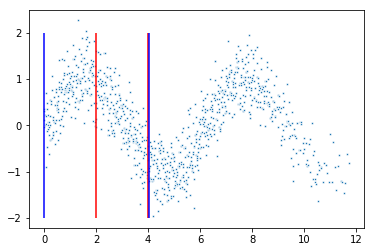

In [172]:
sns.scatterplot(tx, ty, s=6)
plt.vlines(x=2, ymin = -2, ymax=2, colors='red')
plt.vlines(x=4, ymin=-2, ymax=2, colors = 'red')
plt.vlines(x=0, ymin = -2, ymax=2, colors='blue')
plt.vlines(x=4.05, ymin=-2, ymax=2, colors = 'blue')


In [173]:
from sklearn import linear_model

In [174]:
modelR = linear_model.LinearRegression()
modelB = linear_model.LinearRegression()

In [293]:
min_thresh = 2.5
thresh = 5

In [294]:
tSetR = []
tmp = tx[(tx>min_thresh) & (tx<thresh)]
for i in tmp:
    tmp1 = [i, pow(i,2), pow(i,3)]
    tSetR.append(tmp1)
tyR = ty[(tx>min_thresh) & (tx<thresh)]

In [295]:
tSetB = []
tmp = tx[tx<thresh]
for i in tmp:
    tmp1 = [i, pow(i,2), pow(i,3)]
    tSetB.append(tmp1)
tyB = ty[tx<thresh]

In [296]:
modelR.fit(tSetR, tyR)
modelB.fit(tSetB, tyB)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
xGR = x[(x>min_thresh)&(x<thresh)]
xGB = x[x<thresh]

In [298]:
vSetR = []
for i in xGR:
    tmp1 = [i, pow(i,2), pow(i,3)]
    vSetR.append(tmp1)
    
vSetB = []
for i in xGB:
    tmp1 = [i, pow(i,2), pow(i,3)]
    vSetB.append(tmp1)

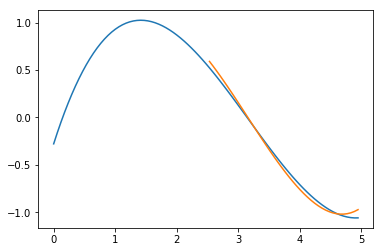

In [299]:
plot(xGB, modelB.predict(vSetB))
plot(xGR, modelR.predict(vSetR))

In [300]:
forecastX = x[x>=thresh]
forecastXSet = []
for i in forecastX:
    tmp1 = [i, pow(i,2), pow(i,3)]
    forecastXSet.append(tmp1)

Text(0.5,1,'')

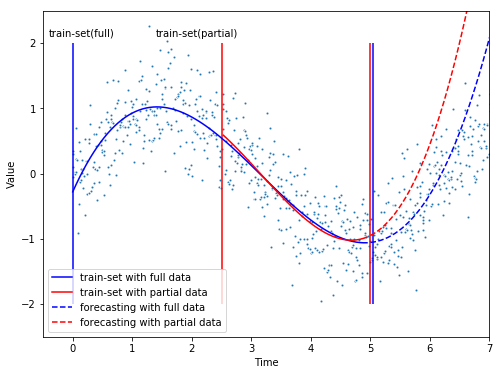

In [303]:
plt.figure(figsize=(8,6))

sns.scatterplot(tx, ty, s=8)
plt.vlines(x=min_thresh, ymin = -2, ymax=2, colors='red')
plt.vlines(x=thresh, ymin=-2, ymax=2, colors = 'red')
plt.vlines(x=0, ymin = -2, ymax=2, colors='blue')
plt.vlines(x=thresh+0.05, ymin=-2, ymax=2, colors = 'blue')

plot(xGB, modelB.predict(vSetB), 'b-', label = "train-set with full data")
plot(xGR, modelR.predict(vSetR), 'r-', label = "train-set with partial data")
plot(forecastX, modelB.predict(forecastXSet), 'b--', label = 'forecasting with full data')
plot(forecastX, modelR.predict(forecastXSet), 'r--', label = 'forecasting with partial data')

plt.ylim(-2.5, 2.5)
plt.xlim(-0.5,7)
plt.xlabel("Time")
plt.ylabel('Value')
plt.text(-0.4,2.1, 'train-set(full)')
plt.text(1.4,2.1, 'train-set(partial)')
plt.legend()
plt.title("")

In [302]:
[i[:2] for i in forecastXSet]

[[5.002954773869348, 25.0295564693821],
 [5.061813065326635, 25.621951508311422],
 [5.120671356783922, 26.221275144187295],
 [5.179529648241208, 26.82752737700969],
 [5.2383879396984945, 27.440708206778638],
 [5.297246231155781, 28.06081763349413],
 [5.356104522613067, 28.68785565715615],
 [5.414962814070353, 29.32182227776472],
 [5.47382110552764, 29.962717495319836],
 [5.532679396984927, 30.610541309821492],
 [5.591537688442214, 31.2652937212697],
 [5.650395979899499, 31.92697472966442],
 [5.709254271356786, 32.59558433500571],
 [5.768112562814072, 33.27112253729352],
 [5.826970854271359, 33.95358933652789],
 [5.885829145728644, 34.642984732708776],
 [5.944687437185931, 35.33930872583623],
 [6.003545728643217, 36.04256131591021],
 [6.062404020100504, 36.75274250293076],
 [6.121262311557792, 37.46985228689784],
 [6.180120603015077, 38.19389066781143],
 [6.238978894472364, 38.9248576456716],
 [6.29783718592965, 39.662753220478294],
 [6.356695477386937, 40.407577392231545],
 [6.41555376

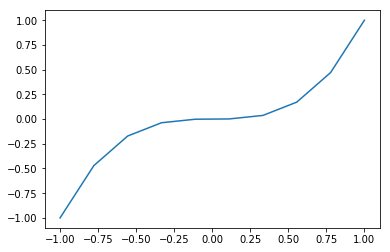

In [155]:
plot(np.linspace(-1,1,10), pow(np.linspace(-1,1,10),3))

In [54]:
testSet = []
for i in tx2:
    tmp = [i, pow(i,2), pow(i,3)]
    testSet.append(tmp)

In [60]:
predSet = []
for i in x[x<4]:
    tmp = [i, pow(i,2), pow(i,3)]
    predSet.append(tmp)

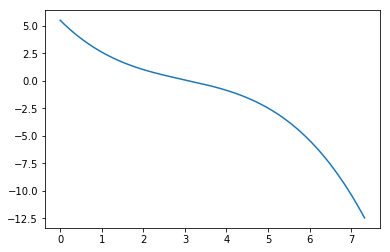

In [53]:
plot(x, model1.predict(predSet))

In [55]:
model2 = linear_model.LinearRegression()
model2.fit(testSet, ty2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

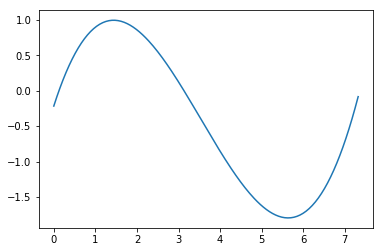

In [56]:
plot(x, model2.predict(predSet))